In [1]:
# Load library
library(tidyverse)
library(dplyr)
library(plotly)
library(leaps)

Warning message:
“package ‘dplyr’ was built under R version 4.3.2”
Warning message:
“package ‘stringr’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [2]:
# Loading data
original_data <- read.csv("data.csv", header=TRUE)
head(original_data)

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Toronto,779900,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000
2,Toronto,799999,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000
3,Toronto,799900,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000
4,Toronto,1200000,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000
5,Toronto,668800,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000
6,Toronto,548000,#2503 -99 HARBOUR SQ,0,1,Ontario,5647656,43.7417,-79.3733,97000


In [3]:
# Drop Address and City because the Latitude and Longitude variables are representing this information
data <- original_data %>% select(-c(Address, City))
head(data)
unique(data$Province)

,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
,<dbl>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,779900,3,2,Ontario,5647656,43.7417,-79.3733,97000
2,799999,3,1,Ontario,5647656,43.7417,-79.3733,97000
3,799900,2,2,Ontario,5647656,43.7417,-79.3733,97000
4,1200000,4,2,Ontario,5647656,43.7417,-79.3733,97000
5,668800,1,1,Ontario,5647656,43.7417,-79.3733,97000
6,548000,0,1,Ontario,5647656,43.7417,-79.3733,97000


[1] "Ontario"                   "British Columbia"         
[3] "Alberta"                   "Manitoba"                 
[5] "Saskatchewan"              "Newfoundland and Labrador"
[7] "New Brunswick"             "Quebec"                   
[9] "Nova Scotia"

In [4]:
# There are 9 provinces in the dataset. 
# To reduce the level of provinces, we group some provinces into larger regions as shown below:
# Atlantic - New Brunswick, Nova Scotia, Newfoundland and Labrador
# Prairies - Alberta, Saskatchewan, Manitoba
data$Province[data$Province %in% c("Nova Scotia", "New Brunswick", "Newfoundland and Labrador")] <- "Atlantic"
data$Province[data$Province %in% c("Alberta", "Saskatchewan", "Manitoba")] <- "Prairies"

In [5]:
names(data)[names(data) == "Province"] <- "Region"
data$Region <- factor(data$Region)
head(data)
unique(data$Region)

,Price,Number_Beds,Number_Baths,Region,Population,Latitude,Longitude,Median_Family_Income
,<dbl>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,779900,3,2,Ontario,5647656,43.7417,-79.3733,97000
2,799999,3,1,Ontario,5647656,43.7417,-79.3733,97000
3,799900,2,2,Ontario,5647656,43.7417,-79.3733,97000
4,1200000,4,2,Ontario,5647656,43.7417,-79.3733,97000
5,668800,1,1,Ontario,5647656,43.7417,-79.3733,97000
6,548000,0,1,Ontario,5647656,43.7417,-79.3733,97000


[1] Ontario          British Columbia Prairies         Atlantic        
[5] Quebec          
Levels: Atlantic British Columbia Ontario Prairies Quebec

In [6]:
# Take log Price
data$logprice <- log(data$Price)
head(data)

,Price,Number_Beds,Number_Baths,Region,Population,Latitude,Longitude,Median_Family_Income,logprice
,<dbl>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,779900,3,2,Ontario,5647656,43.7417,-79.3733,97000,13.56692
2,799999,3,1,Ontario,5647656,43.7417,-79.3733,97000,13.59237
3,799900,2,2,Ontario,5647656,43.7417,-79.3733,97000,13.59224
4,1200000,4,2,Ontario,5647656,43.7417,-79.3733,97000,13.99783
5,668800,1,1,Ontario,5647656,43.7417,-79.3733,97000,13.41324
6,548000,0,1,Ontario,5647656,43.7417,-79.3733,97000,13.21403


In [7]:
# Longitude inside Canada cannot be > 0, these values are missing the negative sign
filtered_data <- data[data$Longitude > 0, ]
head(filtered_data)

,Price,Number_Beds,Number_Baths,Region,Population,Latitude,Longitude,Median_Family_Income,logprice
,<dbl>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
35678,439900,2,2,Atlantic,431479,44.8857,63.1005,86753,12.99430
35679,1250000,4,3,Atlantic,431479,44.8857,63.1005,86753,14.03865
35680,435000,2,2,Atlantic,431479,44.8857,63.1005,86753,12.98310
35681,419000,2,2,Atlantic,431479,44.8857,63.1005,86753,12.94563
35682,399000,3,1,Atlantic,431479,44.8857,63.1005,86753,12.89672
35683,748000,3,2,Atlantic,431479,44.8857,63.1005,86753,13.52516


In [8]:
# Negate the wrongly recorded longitude values
data[data$Longitude > 0, "Longitude"] <- -data[data$Longitude > 0, "Longitude"]
head(data)

,Price,Number_Beds,Number_Baths,Region,Population,Latitude,Longitude,Median_Family_Income,logprice
,<dbl>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,779900,3,2,Ontario,5647656,43.7417,-79.3733,97000,13.56692
2,799999,3,1,Ontario,5647656,43.7417,-79.3733,97000,13.59237
3,799900,2,2,Ontario,5647656,43.7417,-79.3733,97000,13.59224
4,1200000,4,2,Ontario,5647656,43.7417,-79.3733,97000,13.99783
5,668800,1,1,Ontario,5647656,43.7417,-79.3733,97000,13.41324
6,548000,0,1,Ontario,5647656,43.7417,-79.3733,97000,13.21403


Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


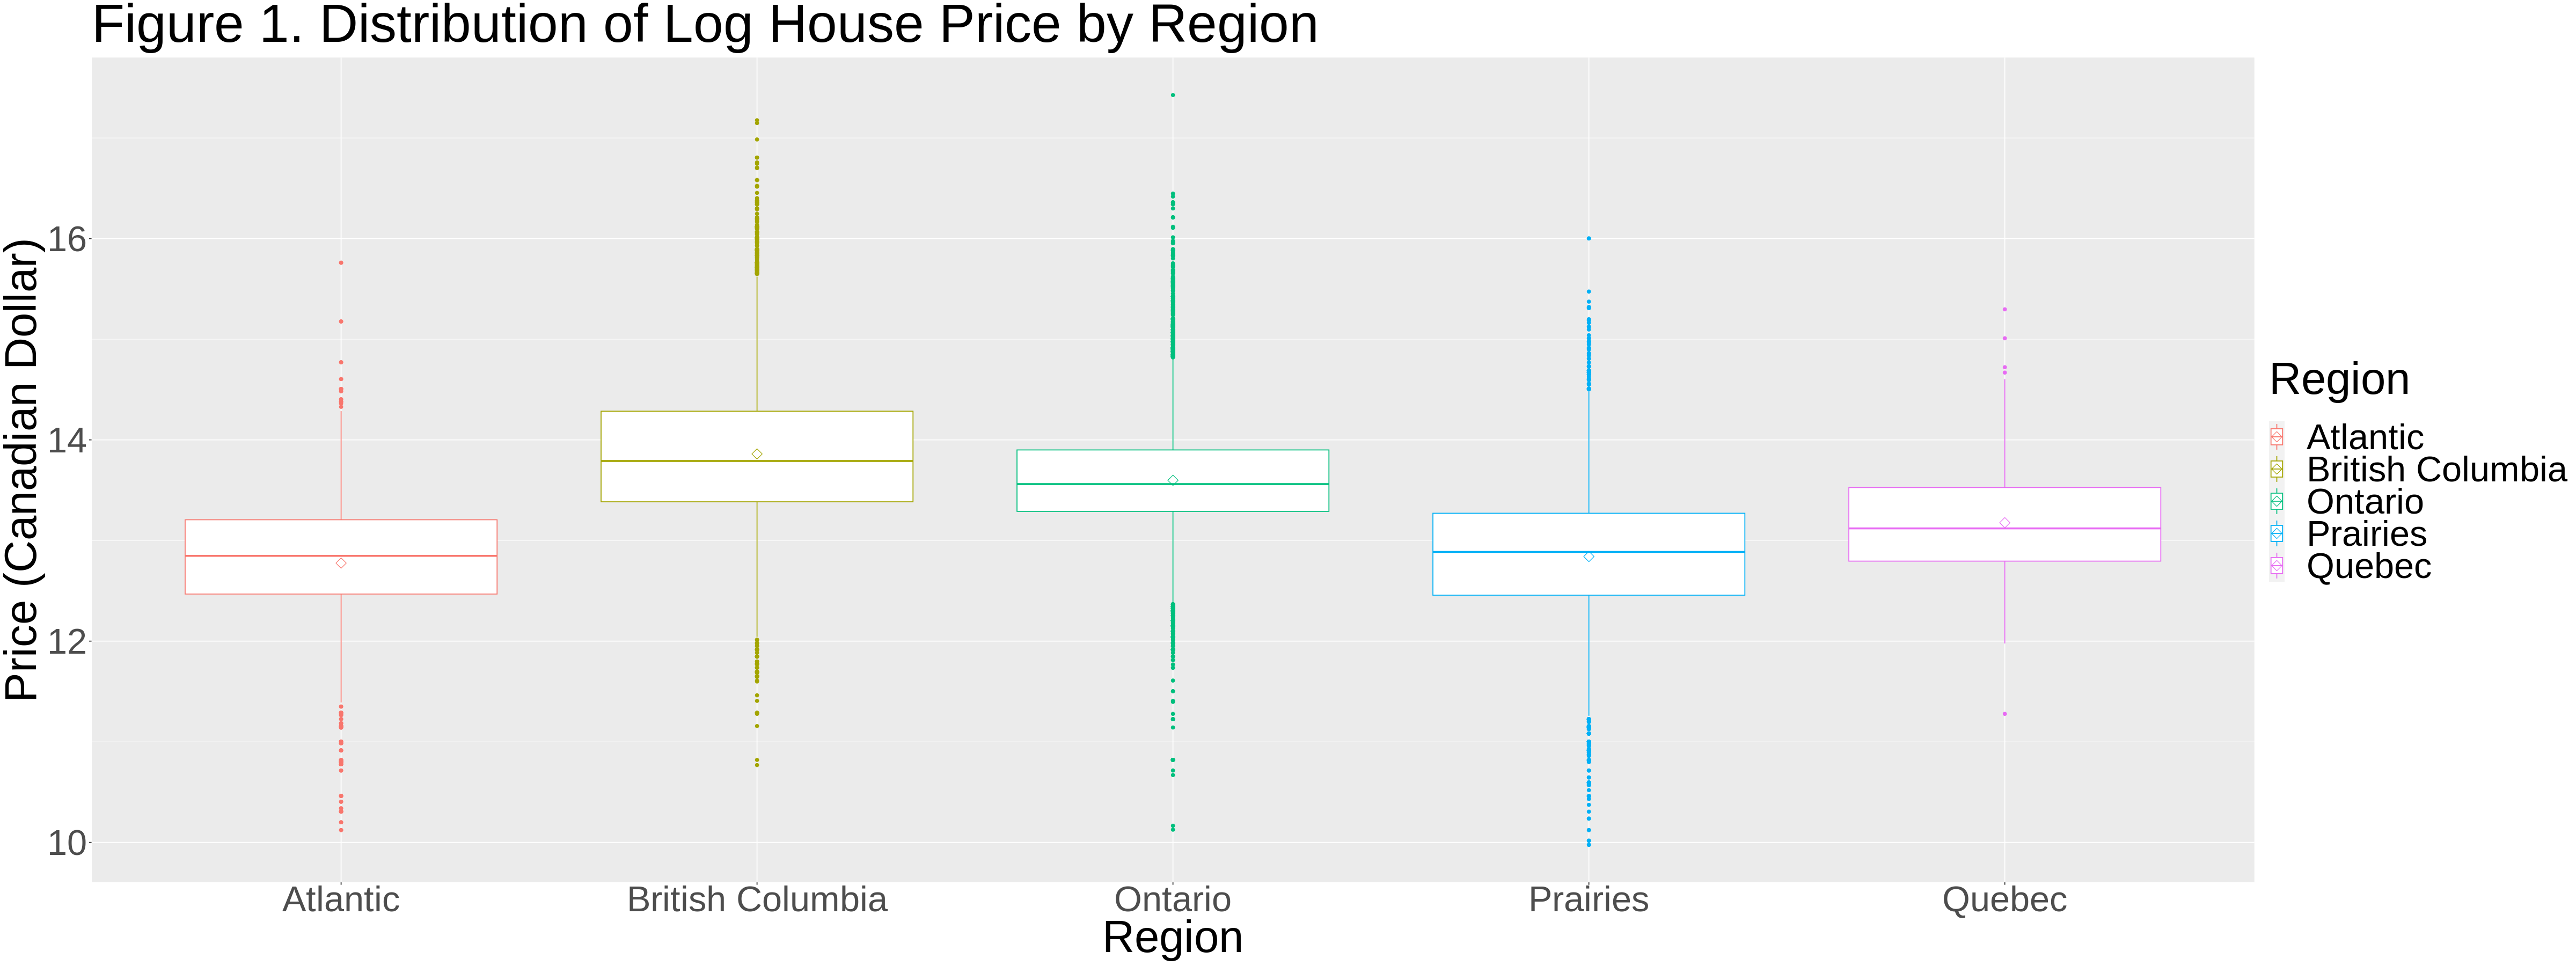

In [9]:
options(repr.plot.width = 40, repr.plot.height = 15)
region <-ggplot(data, aes(x=Region, y=logprice, color=Region)) +
  geom_boxplot() +
  theme(text = element_text(size = 10))+
  labs(x = "Region",
       y = "Price (Canadian Dollar)",
    title = "Figure 1. Distribution of Log House Price by Region") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) +
theme(text = element_text(size = 50))
region

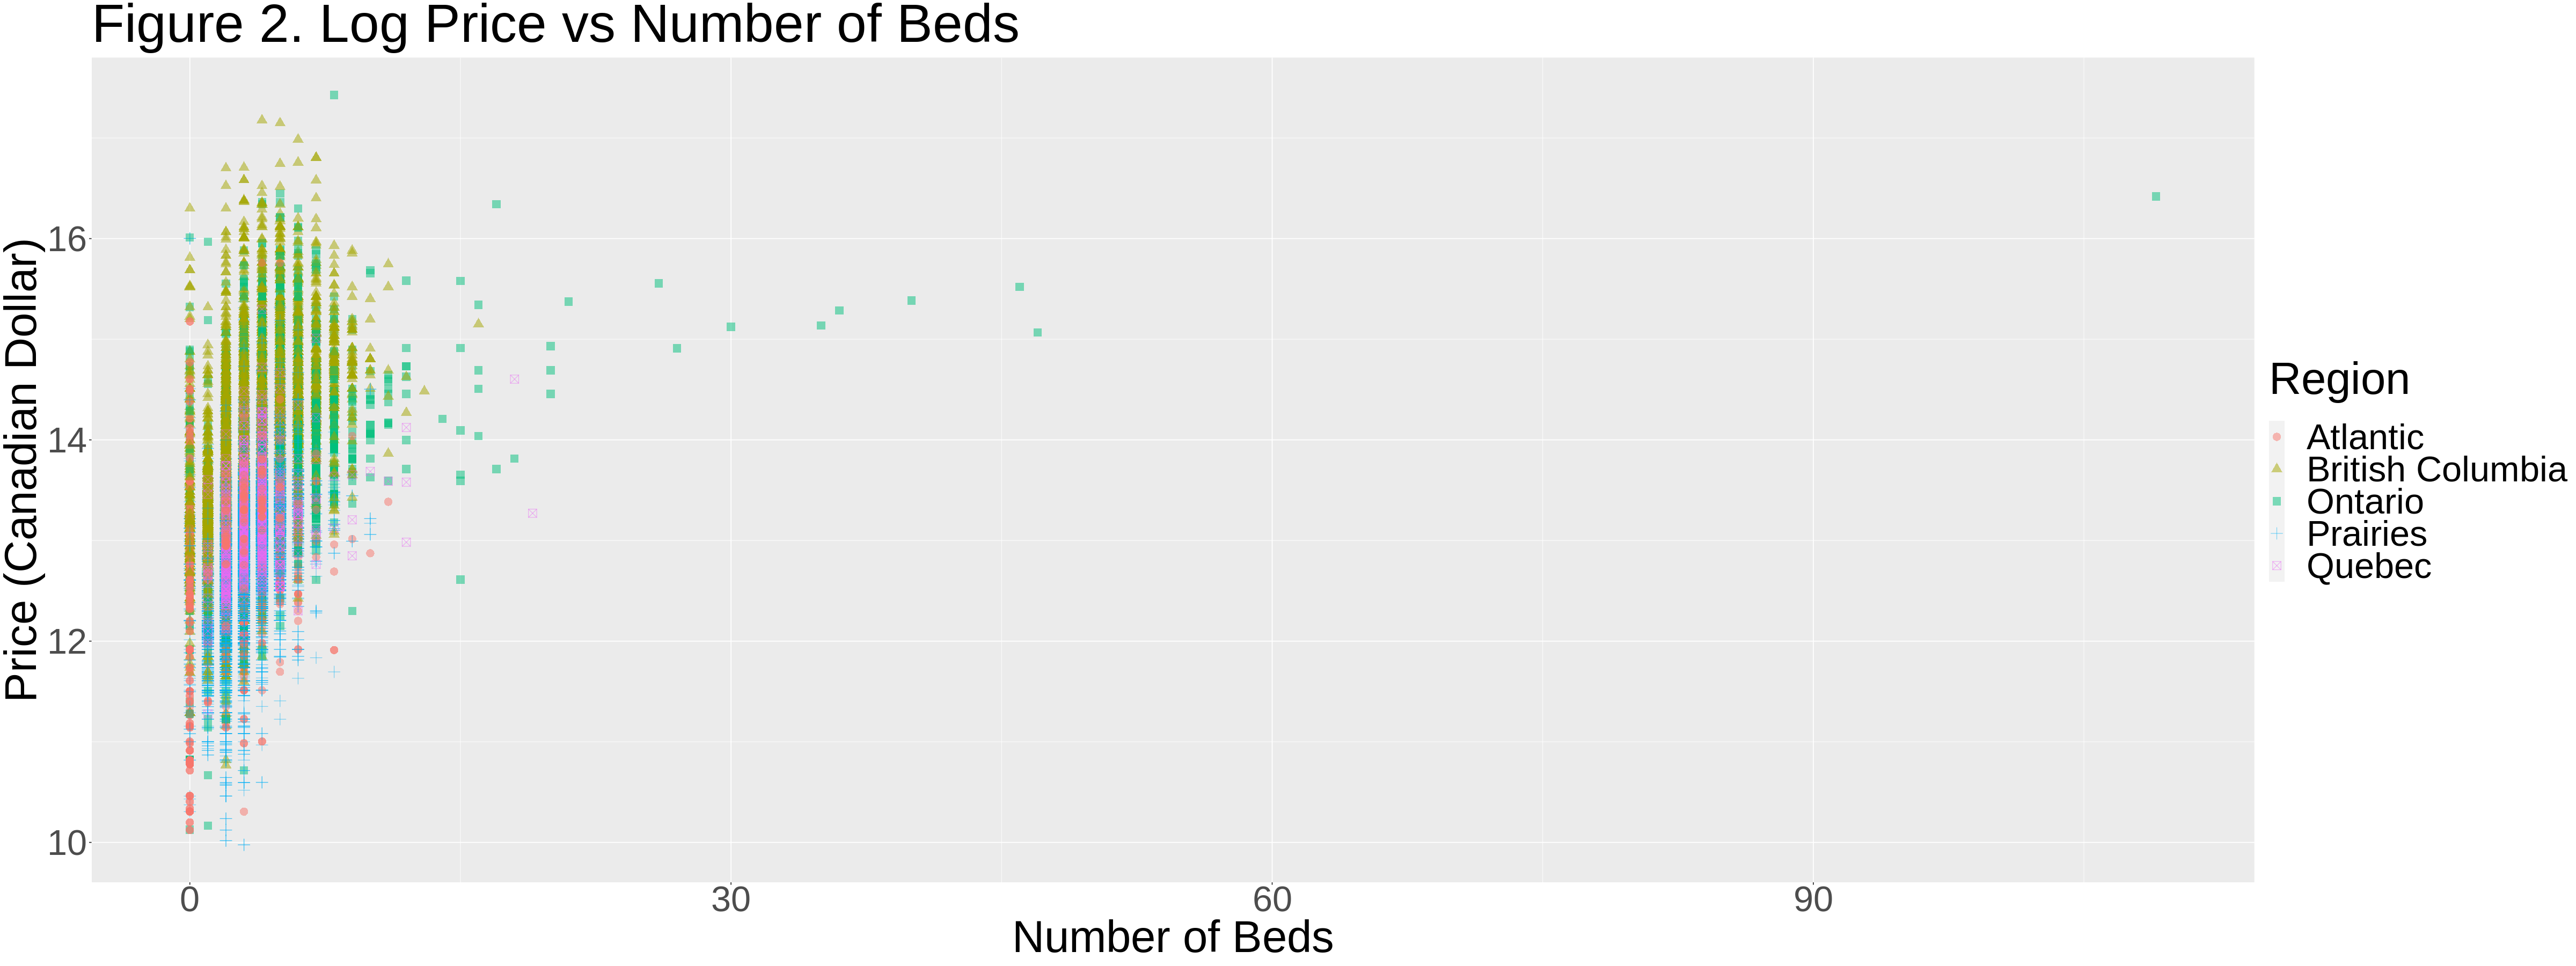

In [10]:
beds <- ggplot(data, aes(x = Number_Beds , y = logprice)) +
  geom_point(
    aes(color = Region, shape = Region),
    size = 4,
    alpha = 0.5
  )+
  xlab("Number of Beds") +
  ylab("Price (Canadian Dollar)") +
  labs(title = "Figure 2. Log Price vs Number of Beds") +
  theme(text = element_text(size = 50))
beds

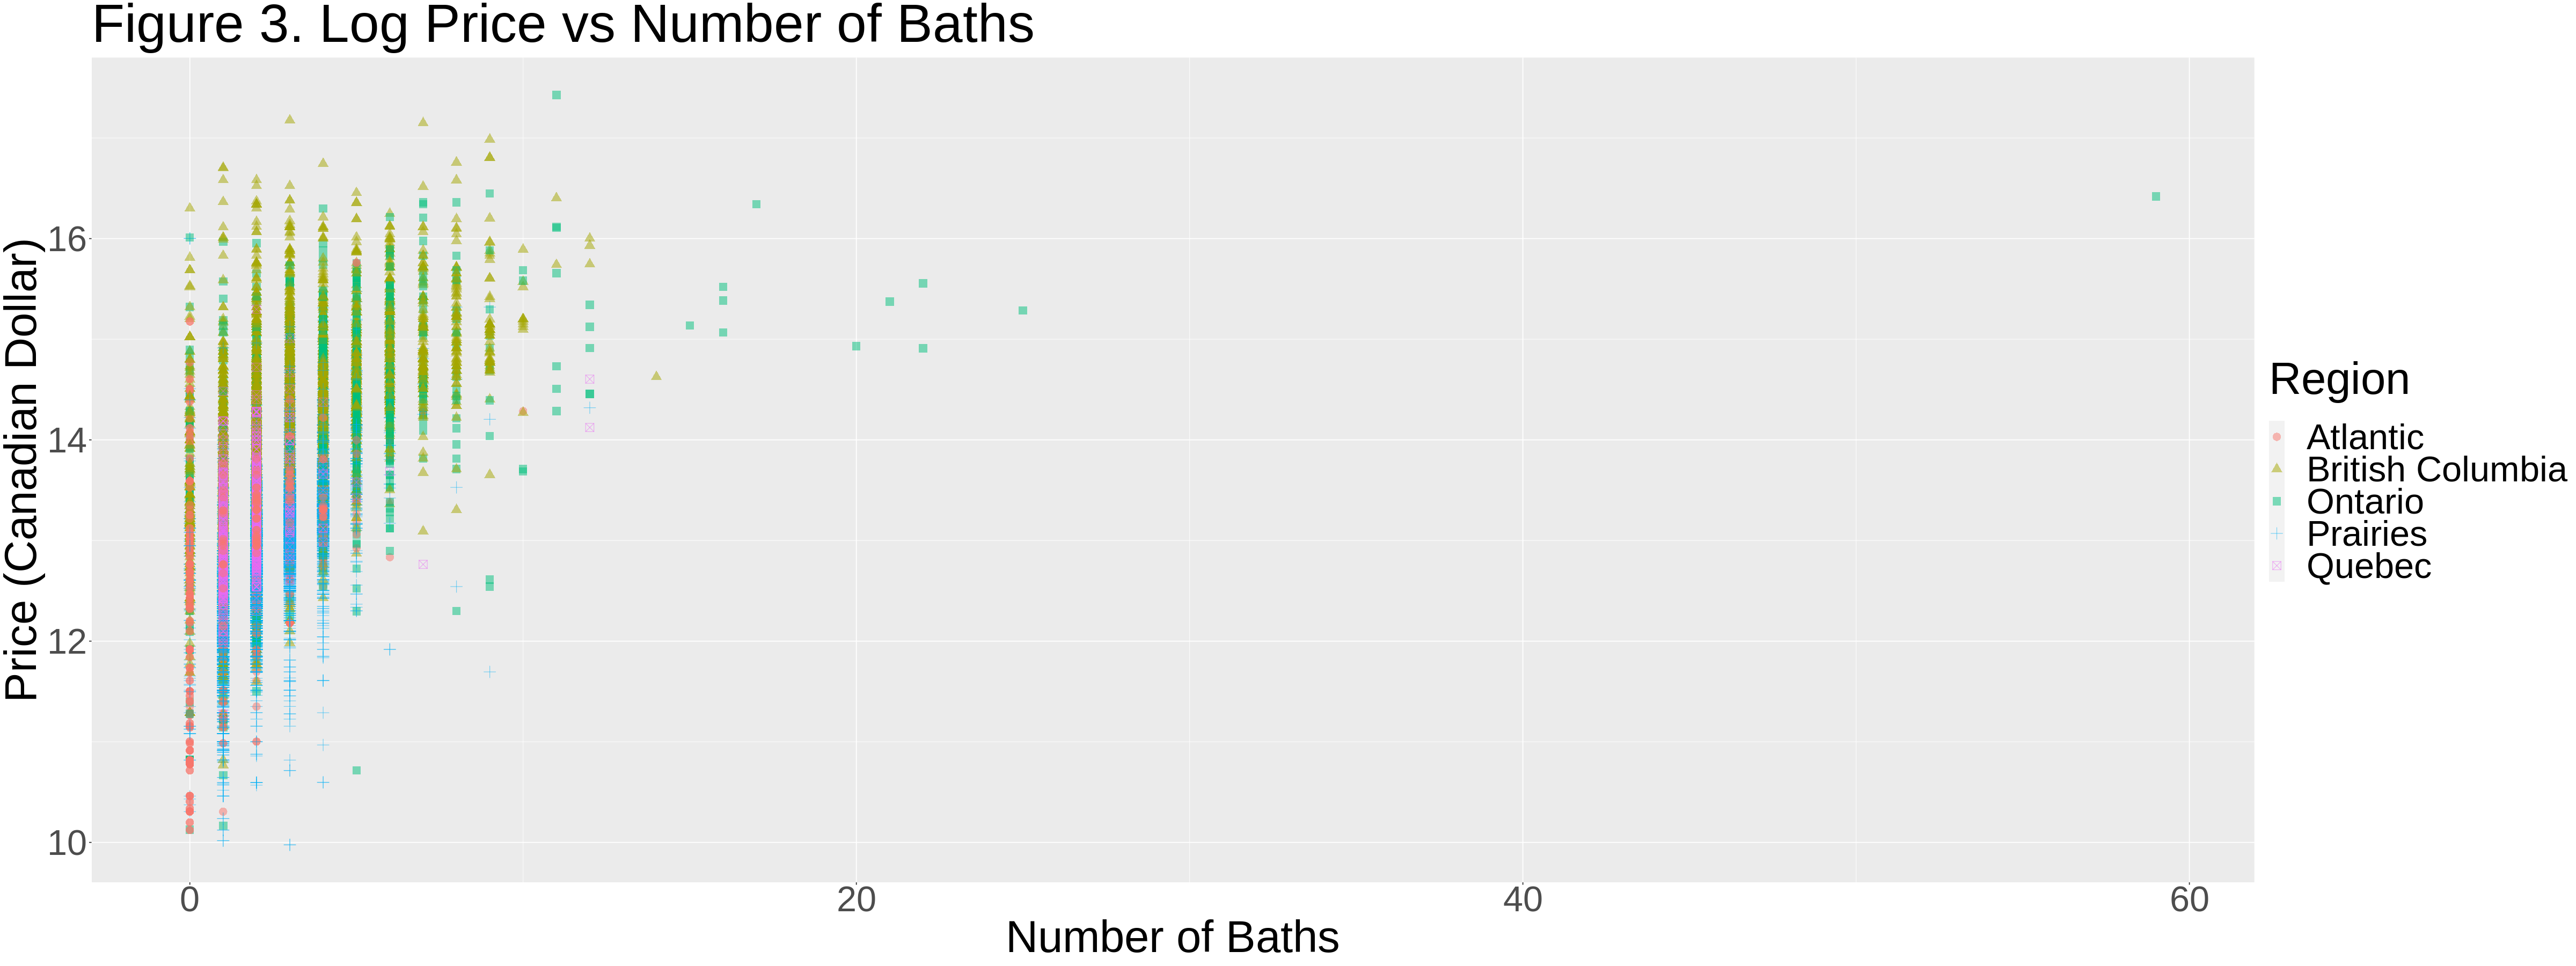

In [11]:
baths <- ggplot(data, aes(x = Number_Baths, y = logprice)) +
  geom_point(
    aes(color = Region, shape = Region),
    size = 4,
    alpha = 0.5
  )+
  xlab("Number of Baths") +
  ylab("Price (Canadian Dollar)") +
  labs(title = "Figure 3. Log Price vs Number of Baths") +
  theme(text = element_text(size = 50))
baths

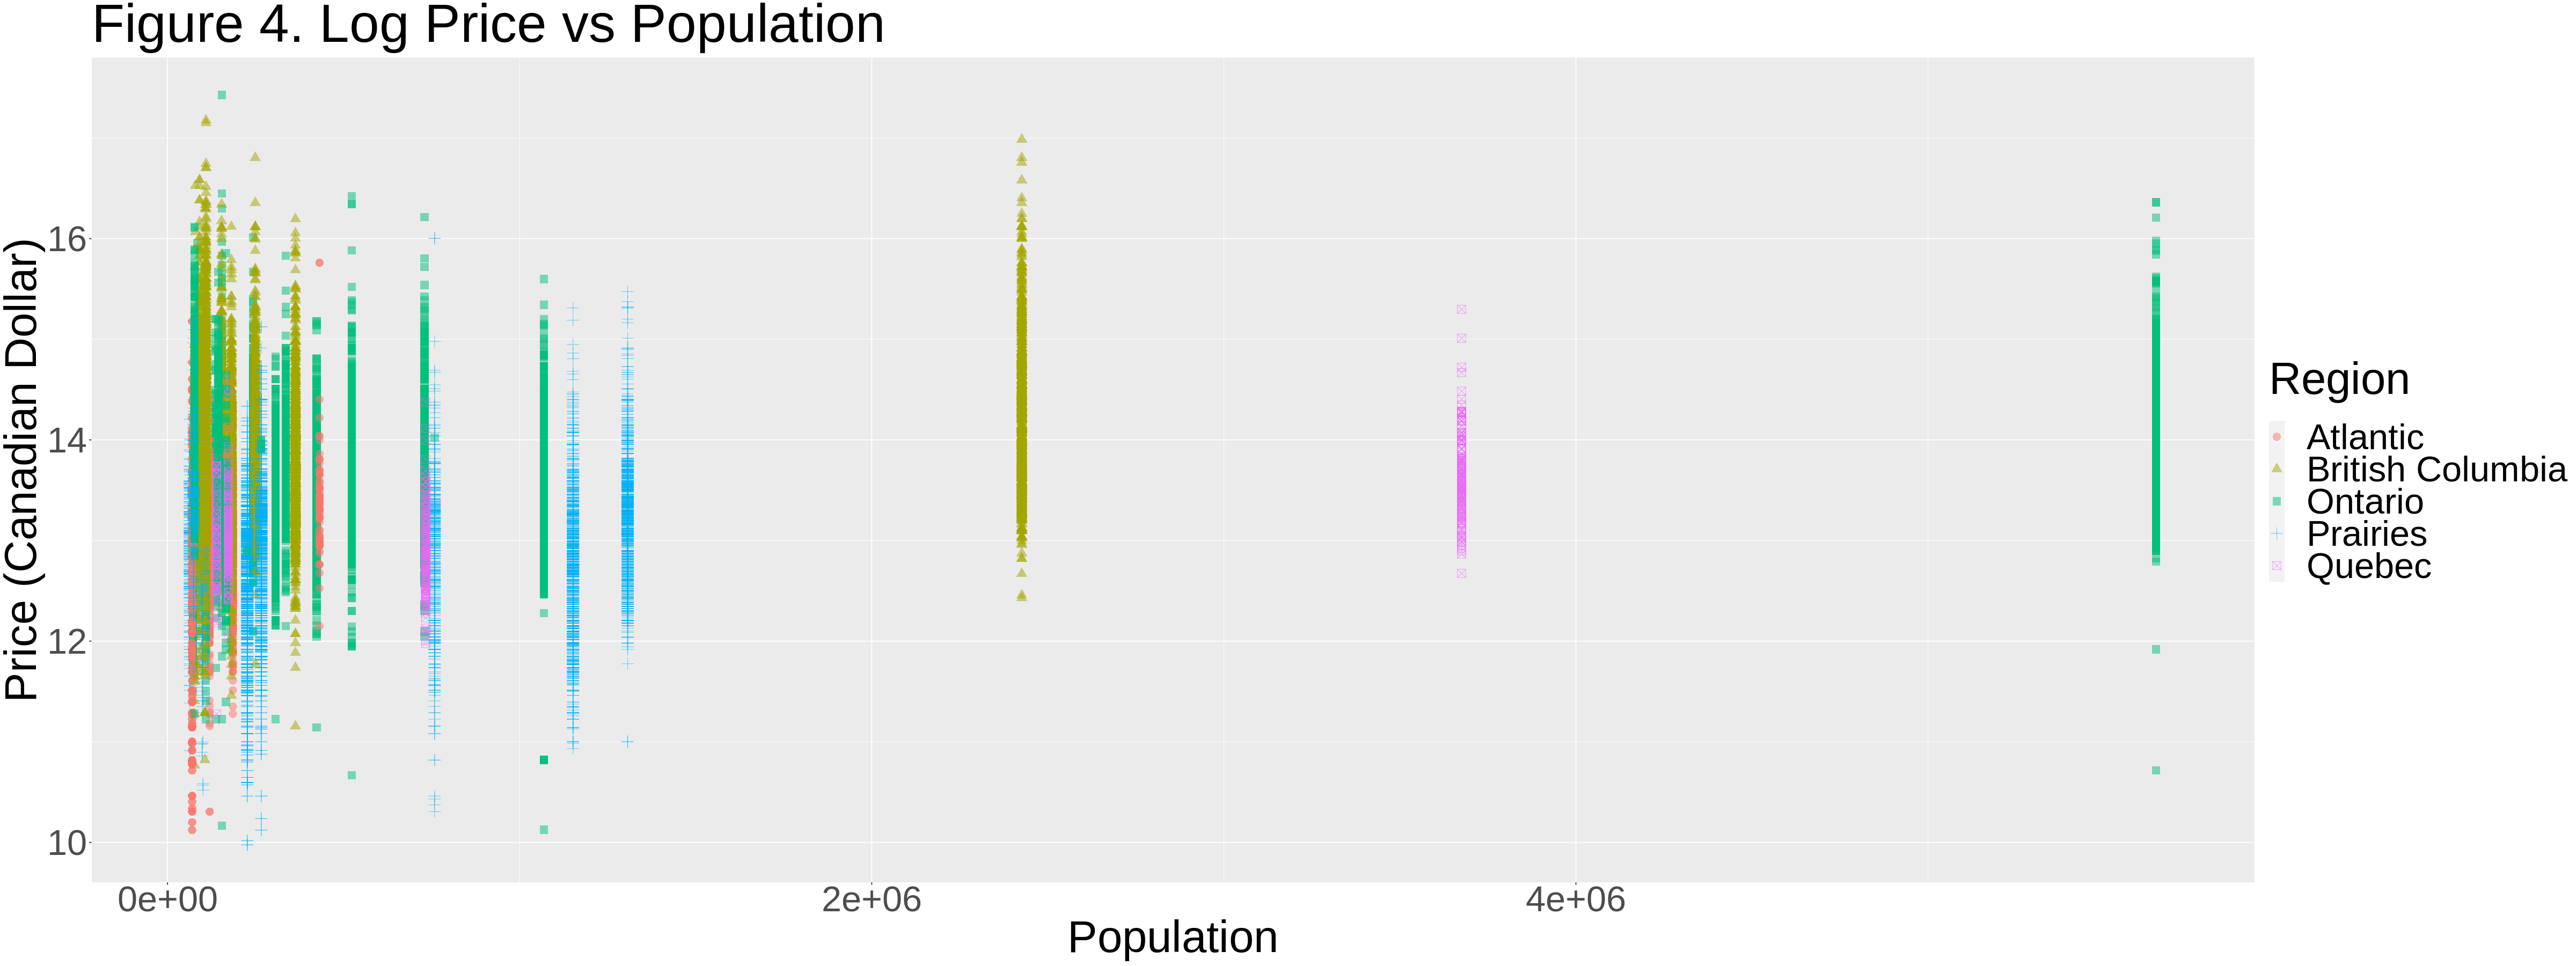

In [12]:
population <- ggplot(data, aes(x = Population , y = logprice)) +
  geom_point(
    aes(color = Region, shape = Region),
    size = 4,
    alpha = 0.5
  )+
  xlab("Population") +
  ylab("Price (Canadian Dollar)") +
  labs(title = "Figure 4. Log Price vs Population") +
  theme(text = element_text(size = 50))
population

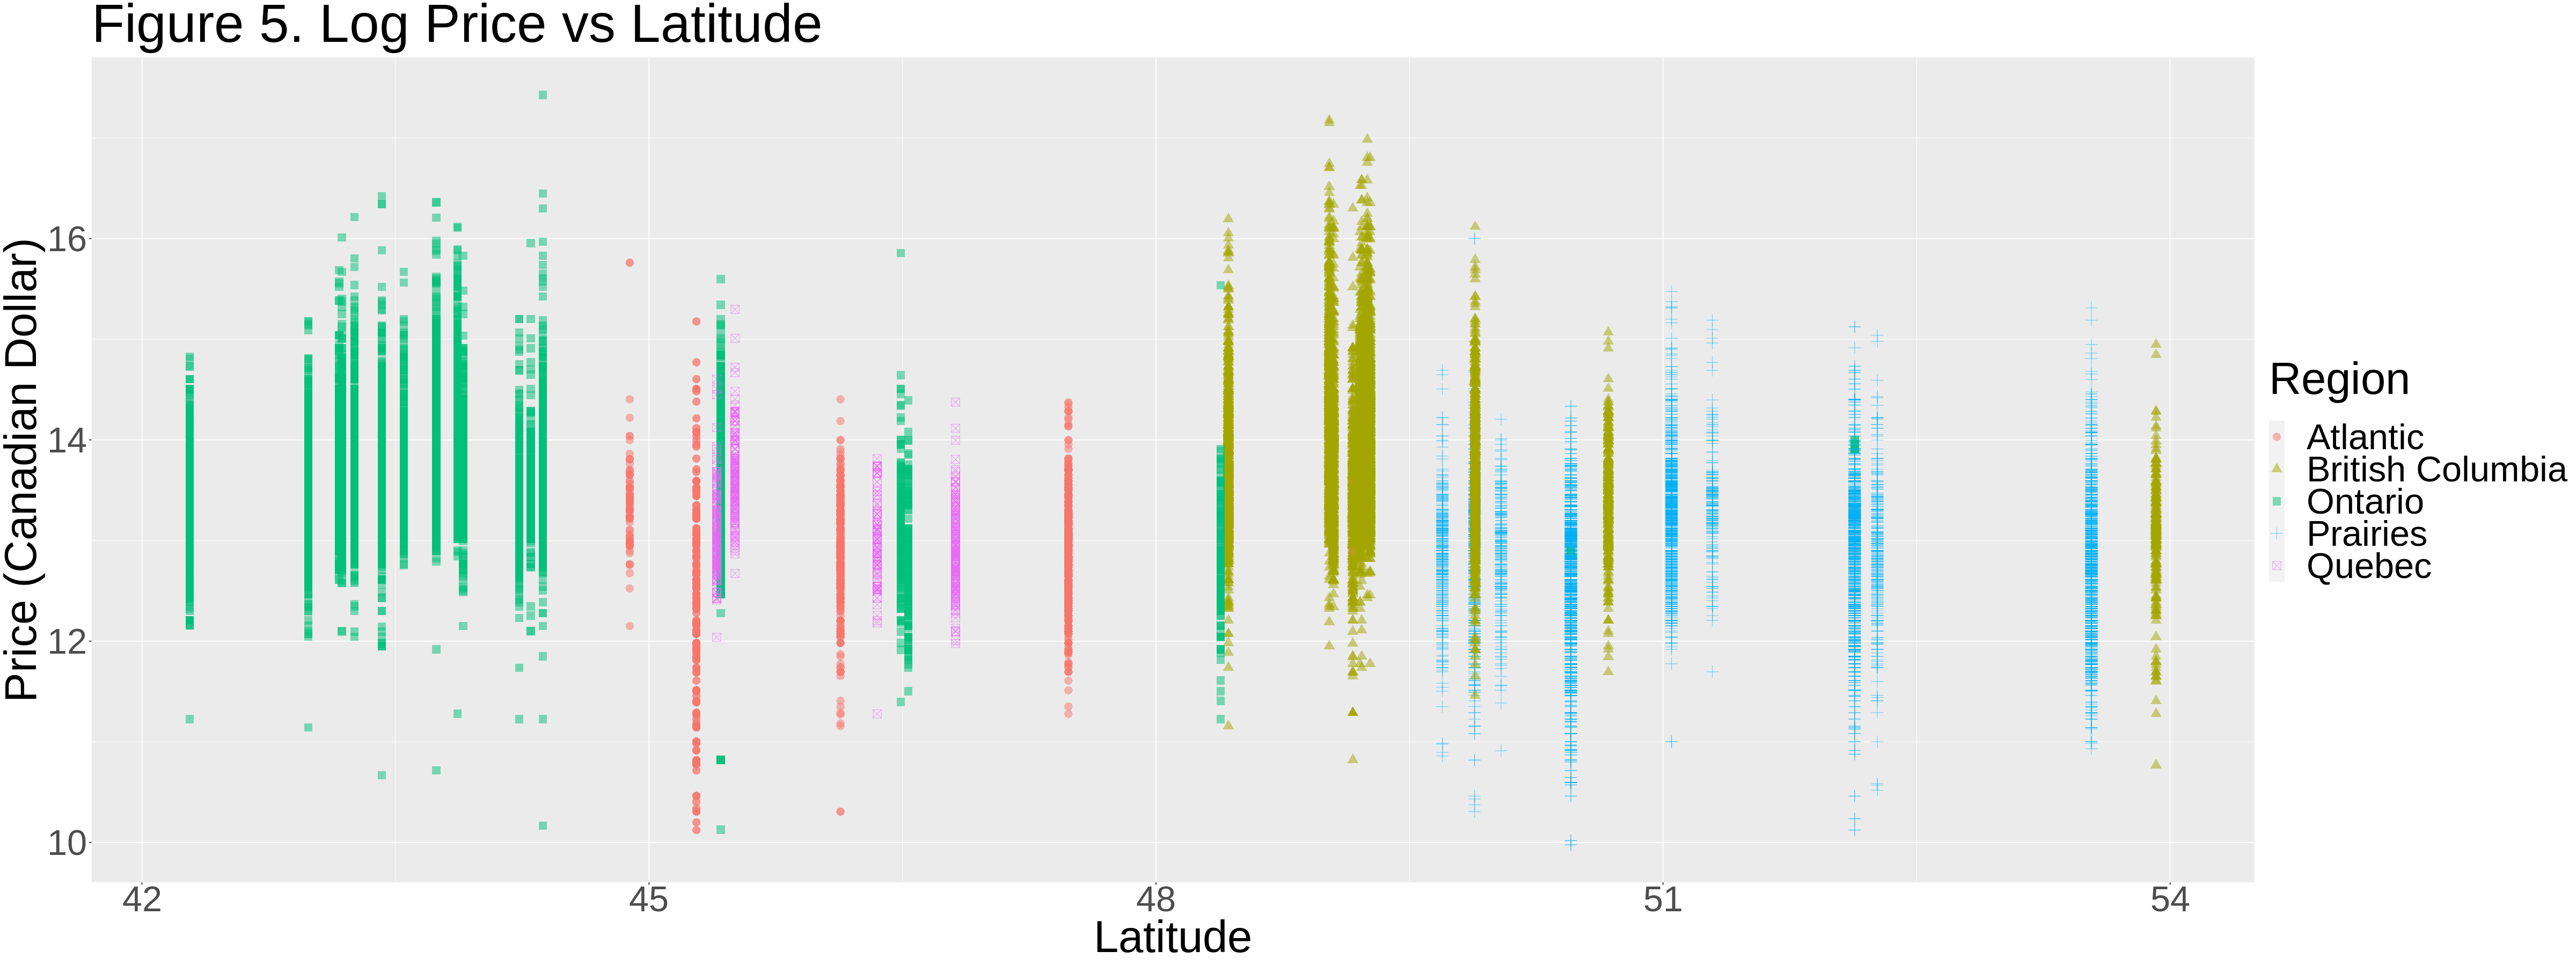

In [13]:
latitude <- ggplot(data, aes(x = Latitude , y = logprice)) +
  geom_point(
    aes(color = Region, shape = Region),
    size = 4,
    alpha = 0.5
  )+
  xlab("Latitude") +
  ylab("Price (Canadian Dollar)") +
  labs(title = "Figure 5. Log Price vs Latitude") +
  theme(text = element_text(size = 50))
latitude

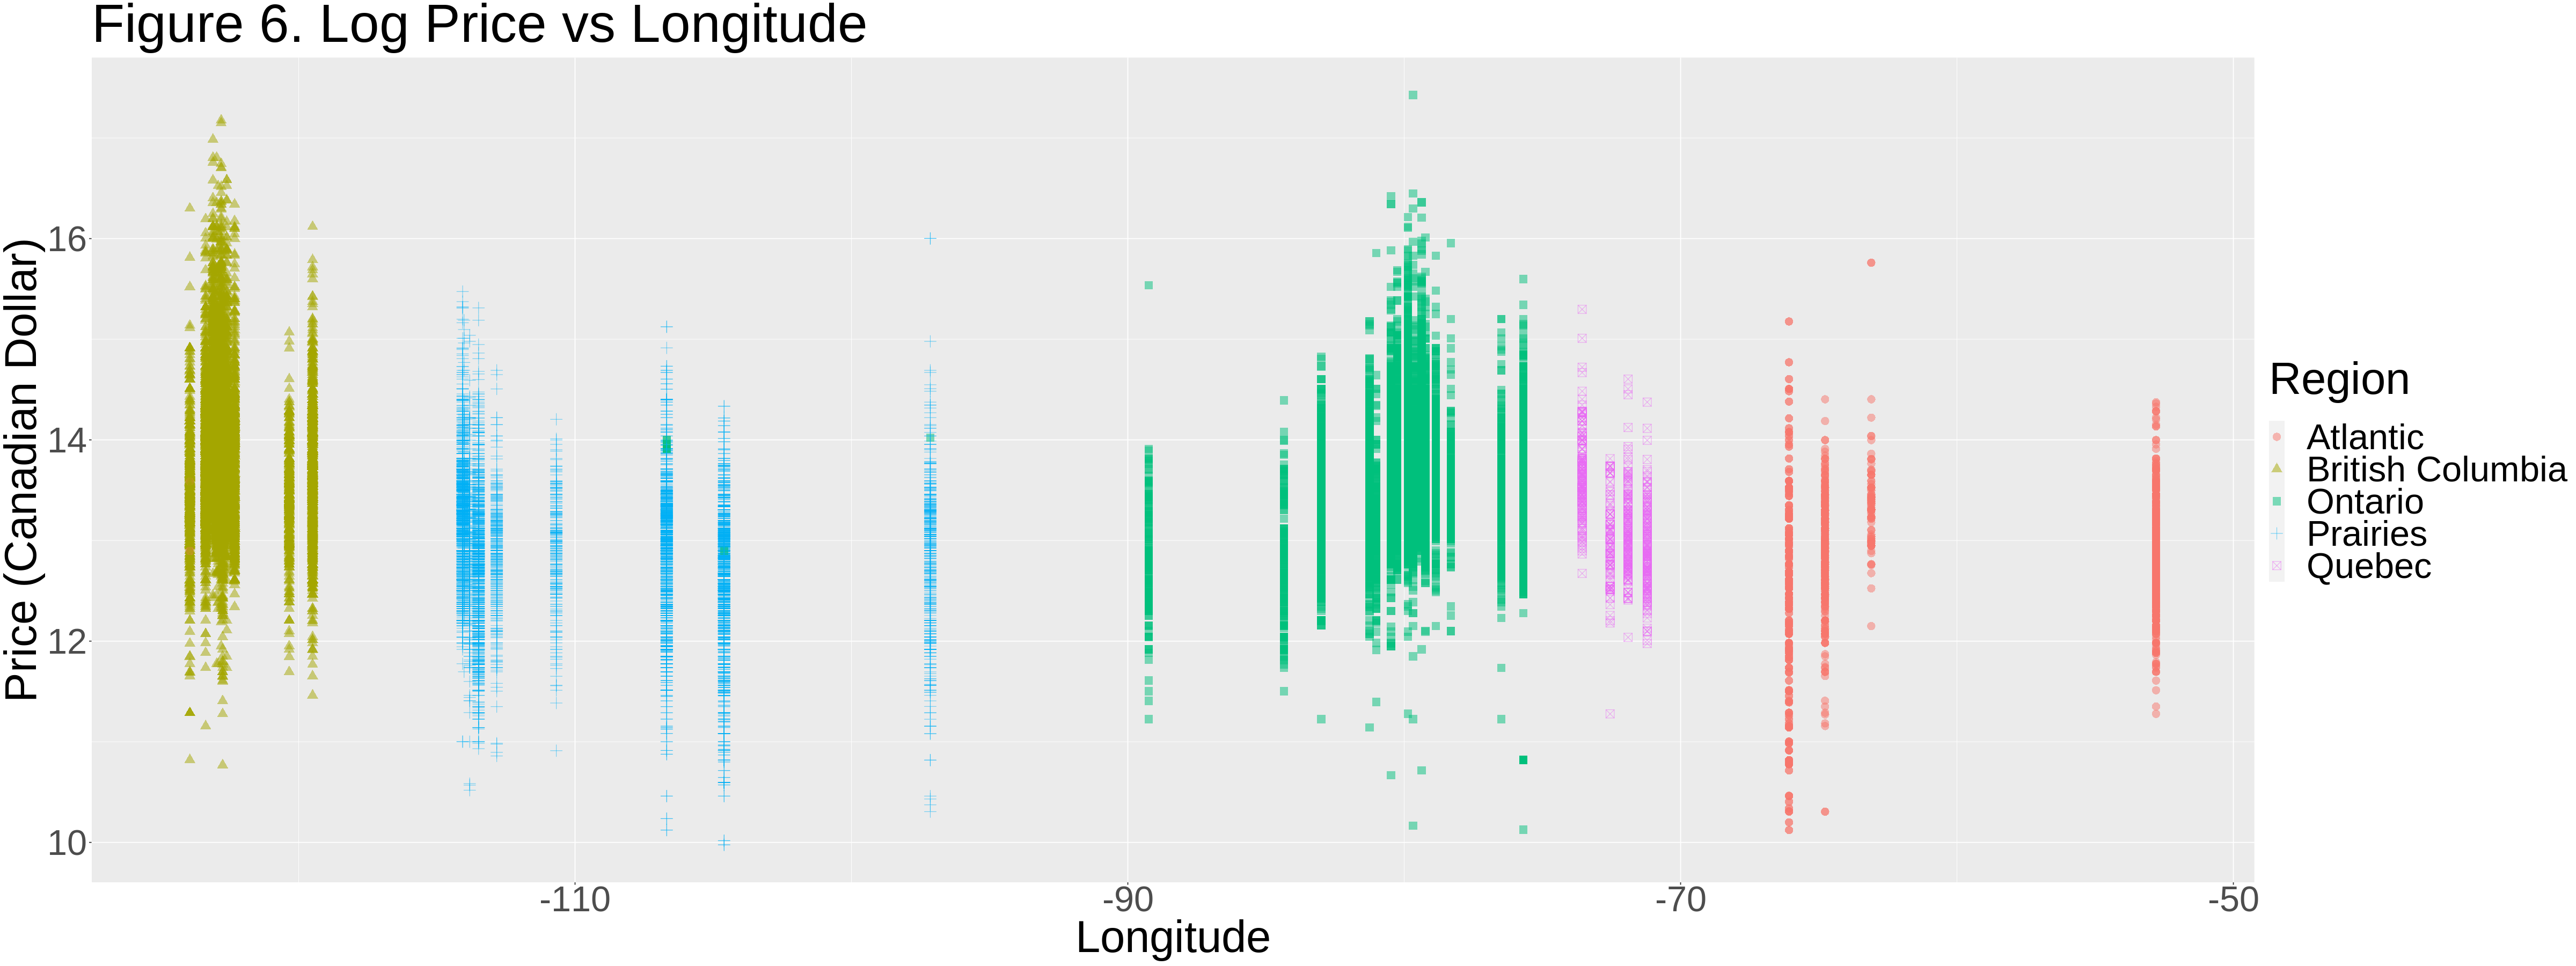

In [14]:
longitude <- ggplot(data, aes(x = Longitude , y = logprice)) +
  geom_point(
    aes(color = Region, shape = Region),
    size = 4,
    alpha = 0.5
  )+
  xlab("Longitude") +
  ylab("Price (Canadian Dollar)") +
  labs(title = "Figure 6. Log Price vs Longitude") +
  theme(text = element_text(size = 50))
longitude

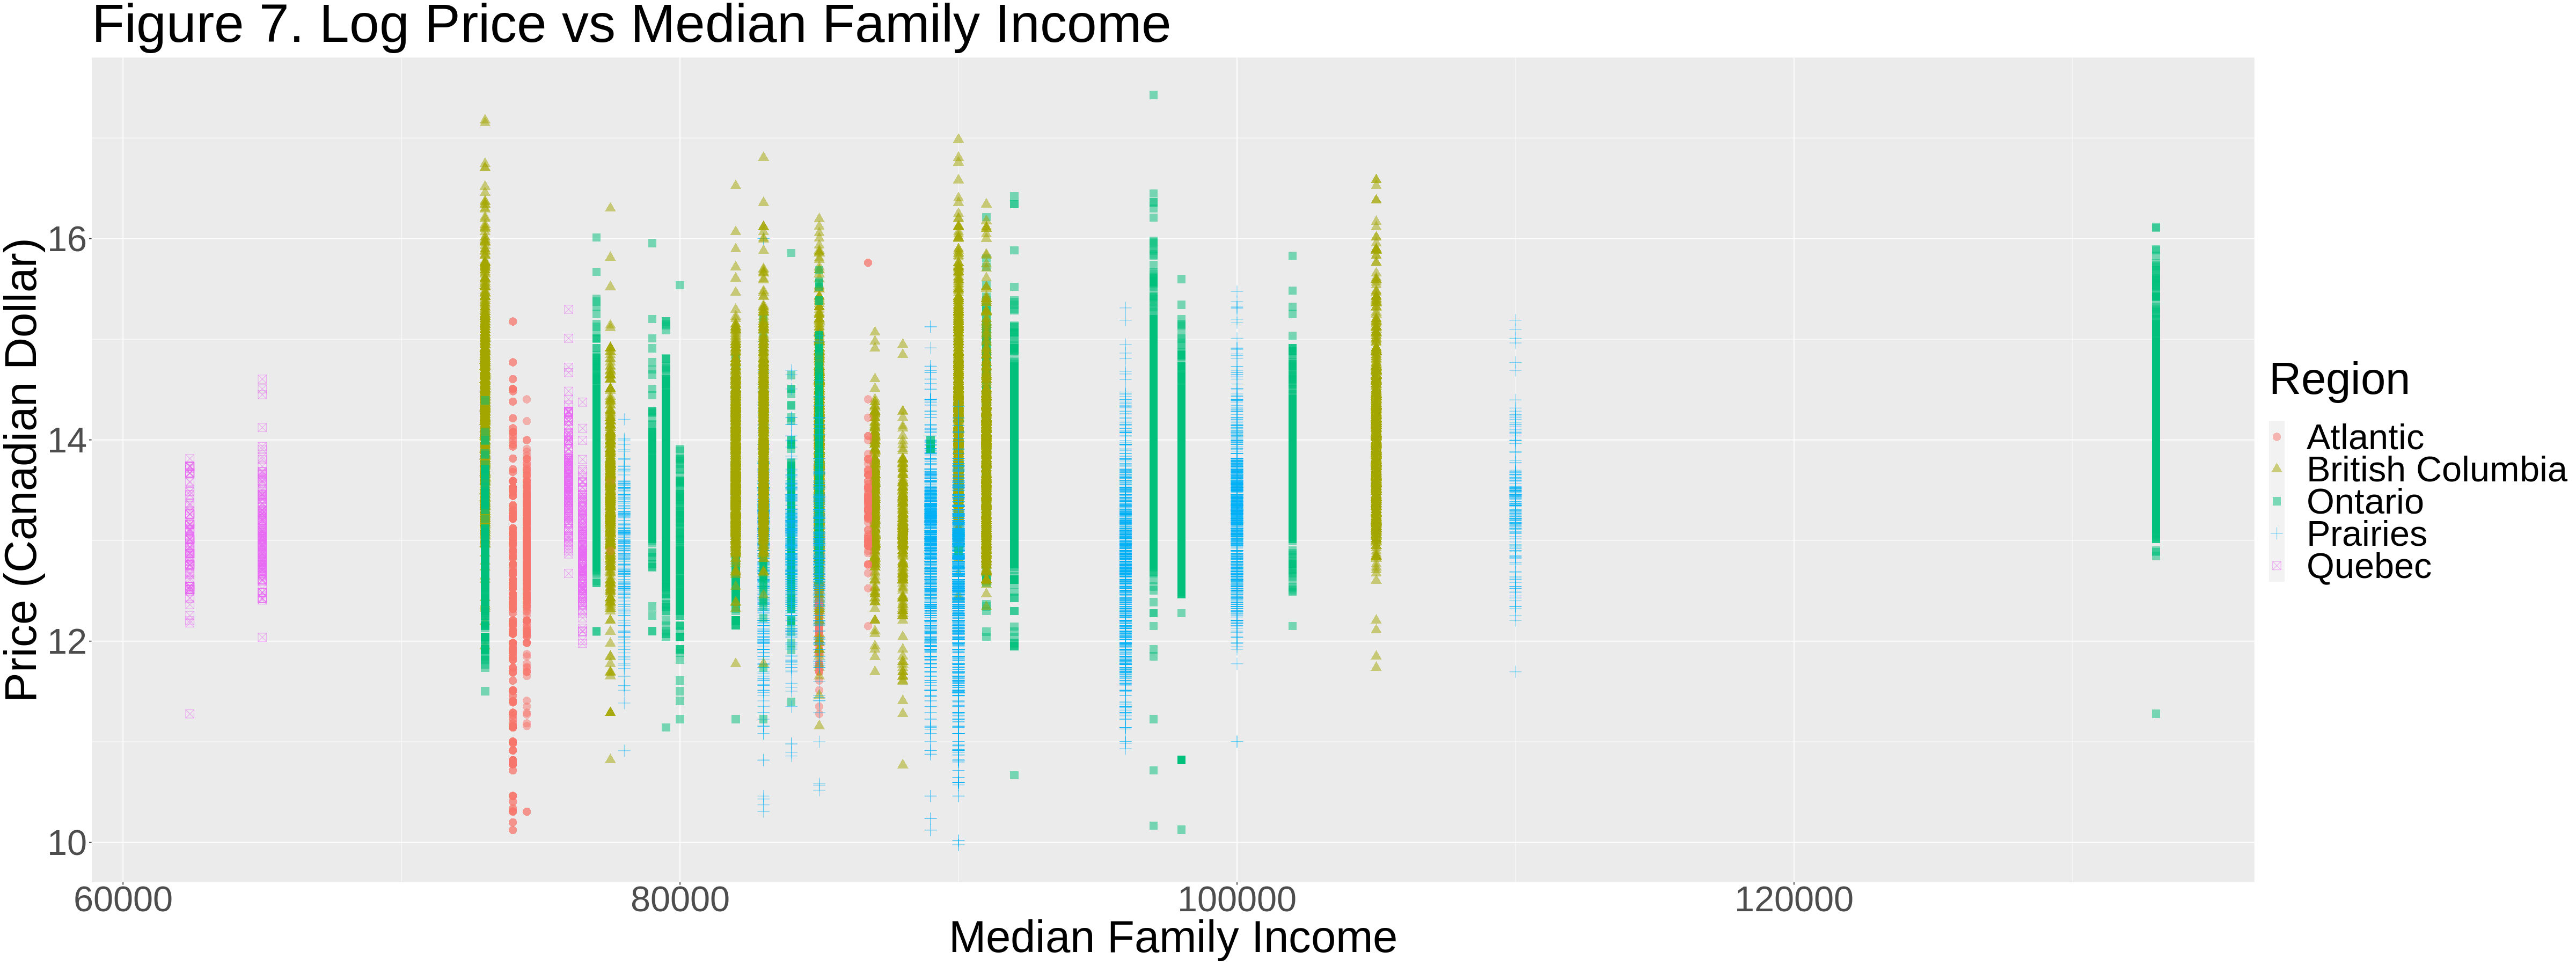

In [15]:
income <- ggplot(data, aes(x = Median_Family_Income, y = logprice)) +
  geom_point(
    aes(color = Region, shape = Region),
    size = 4,
    alpha = 0.5
  )+
  xlab("Median Family Income") +
  ylab("Price (Canadian Dollar)") +
  labs(title = "Figure 7. Log Price vs Median Family Income") +
  theme(text = element_text(size = 50))
income

In [16]:
# Fit the full model
full_model <- lm(logprice~Number_Beds+Number_Baths+Region+Population+Latitude+Longitude+Median_Family_Income, data=data)
summary(full_model)


Call:
lm(formula = logprice ~ Number_Beds + Number_Baths + Region + 
    Population + Latitude + Longitude + Median_Family_Income, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4954  -0.2558  -0.0241   0.2292   3.9049 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.485e+01  1.235e-01 120.239  < 2e-16 ***
Number_Beds             3.234e-02  2.200e-03  14.699  < 2e-16 ***
Number_Baths            2.466e-01  2.787e-03  88.476  < 2e-16 ***
RegionBritish Columbia  4.770e-01  5.172e-02   9.223  < 2e-16 ***
RegionOntario           9.141e-02  2.192e-02   4.170 3.05e-05 ***
RegionPrairies         -2.467e-01  4.230e-02  -5.832 5.52e-09 ***
RegionQuebec            2.744e-01  2.347e-02  11.692  < 2e-16 ***
Population              9.283e-08  2.345e-09  39.584  < 2e-16 ***
Latitude               -8.302e-02  2.543e-03 -32.644  < 2e-16 ***
Longitude              -1.039e-02  8.063e-04 -12.880  < 2e-16 ***
Media

In [17]:
# Perform forward selection. The result shows that full model is the best.
final_model_fwd <- step(full_model, direction = "forward")
summary(final_model_fwd)

Start:  AIC=-52559.92
logprice ~ Number_Beds + Number_Baths + Region + Population + 
    Latitude + Longitude + Median_Family_Income




Call:
lm(formula = logprice ~ Number_Beds + Number_Baths + Region + 
    Population + Latitude + Longitude + Median_Family_Income, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4954  -0.2558  -0.0241   0.2292   3.9049 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.485e+01  1.235e-01 120.239  < 2e-16 ***
Number_Beds             3.234e-02  2.200e-03  14.699  < 2e-16 ***
Number_Baths            2.466e-01  2.787e-03  88.476  < 2e-16 ***
RegionBritish Columbia  4.770e-01  5.172e-02   9.223  < 2e-16 ***
RegionOntario           9.141e-02  2.192e-02   4.170 3.05e-05 ***
RegionPrairies         -2.467e-01  4.230e-02  -5.832 5.52e-09 ***
RegionQuebec            2.744e-01  2.347e-02  11.692  < 2e-16 ***
Population              9.283e-08  2.345e-09  39.584  < 2e-16 ***
Latitude               -8.302e-02  2.543e-03 -32.644  < 2e-16 ***
Longitude              -1.039e-02  8.063e-04 -12.880  < 2e-16 ***
Media

In [18]:
# Perform backward selection. The result also gives full model as the best model.
final_model_bck <- step(full_model, direction = "backward")
summary(final_model_bck)

Start:  AIC=-52559.92
logprice ~ Number_Beds + Number_Baths + Region + Population + 
    Latitude + Longitude + Median_Family_Income

                       Df Sum of Sq     RSS    AIC
<none>                               8223.3 -52560
- Longitude             1     38.15  8261.4 -52396
- Number_Beds           1     49.69  8273.0 -52346
- Median_Family_Income  1    190.54  8413.8 -51743
- Latitude              1    245.07  8468.4 -51512
- Population            1    360.34  8583.6 -51028
- Region                4   1187.16  9410.5 -47745
- Number_Baths          1   1800.27 10023.6 -45481



Call:
lm(formula = logprice ~ Number_Beds + Number_Baths + Region + 
    Population + Latitude + Longitude + Median_Family_Income, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4954  -0.2558  -0.0241   0.2292   3.9049 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.485e+01  1.235e-01 120.239  < 2e-16 ***
Number_Beds             3.234e-02  2.200e-03  14.699  < 2e-16 ***
Number_Baths            2.466e-01  2.787e-03  88.476  < 2e-16 ***
RegionBritish Columbia  4.770e-01  5.172e-02   9.223  < 2e-16 ***
RegionOntario           9.141e-02  2.192e-02   4.170 3.05e-05 ***
RegionPrairies         -2.467e-01  4.230e-02  -5.832 5.52e-09 ***
RegionQuebec            2.744e-01  2.347e-02  11.692  < 2e-16 ***
Population              9.283e-08  2.345e-09  39.584  < 2e-16 ***
Latitude               -8.302e-02  2.543e-03 -32.644  < 2e-16 ***
Longitude              -1.039e-02  8.063e-04 -12.880  < 2e-16 ***
Media

In [19]:
# Perform an exhaustive search. Based on the C_p plot, we decided that a model with 6 variables (7 parameters) seem
# to be the best model. Since some categories of the Region variable are not selected, we decided to drop the Region
# category
search <- regsubsets(logprice~Number_Beds+Number_Baths+Region+Population+Latitude+Longitude+Median_Family_Income, 
                     data = data, method = "exhaustive")
summary(search)$which

,(Intercept),Number_Beds,Number_Baths,RegionBritish Columbia,RegionOntario,RegionPrairies,RegionQuebec,Population,Latitude,Longitude,Median_Family_Income
1,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
4,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE
5,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
6,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
7,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
8,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


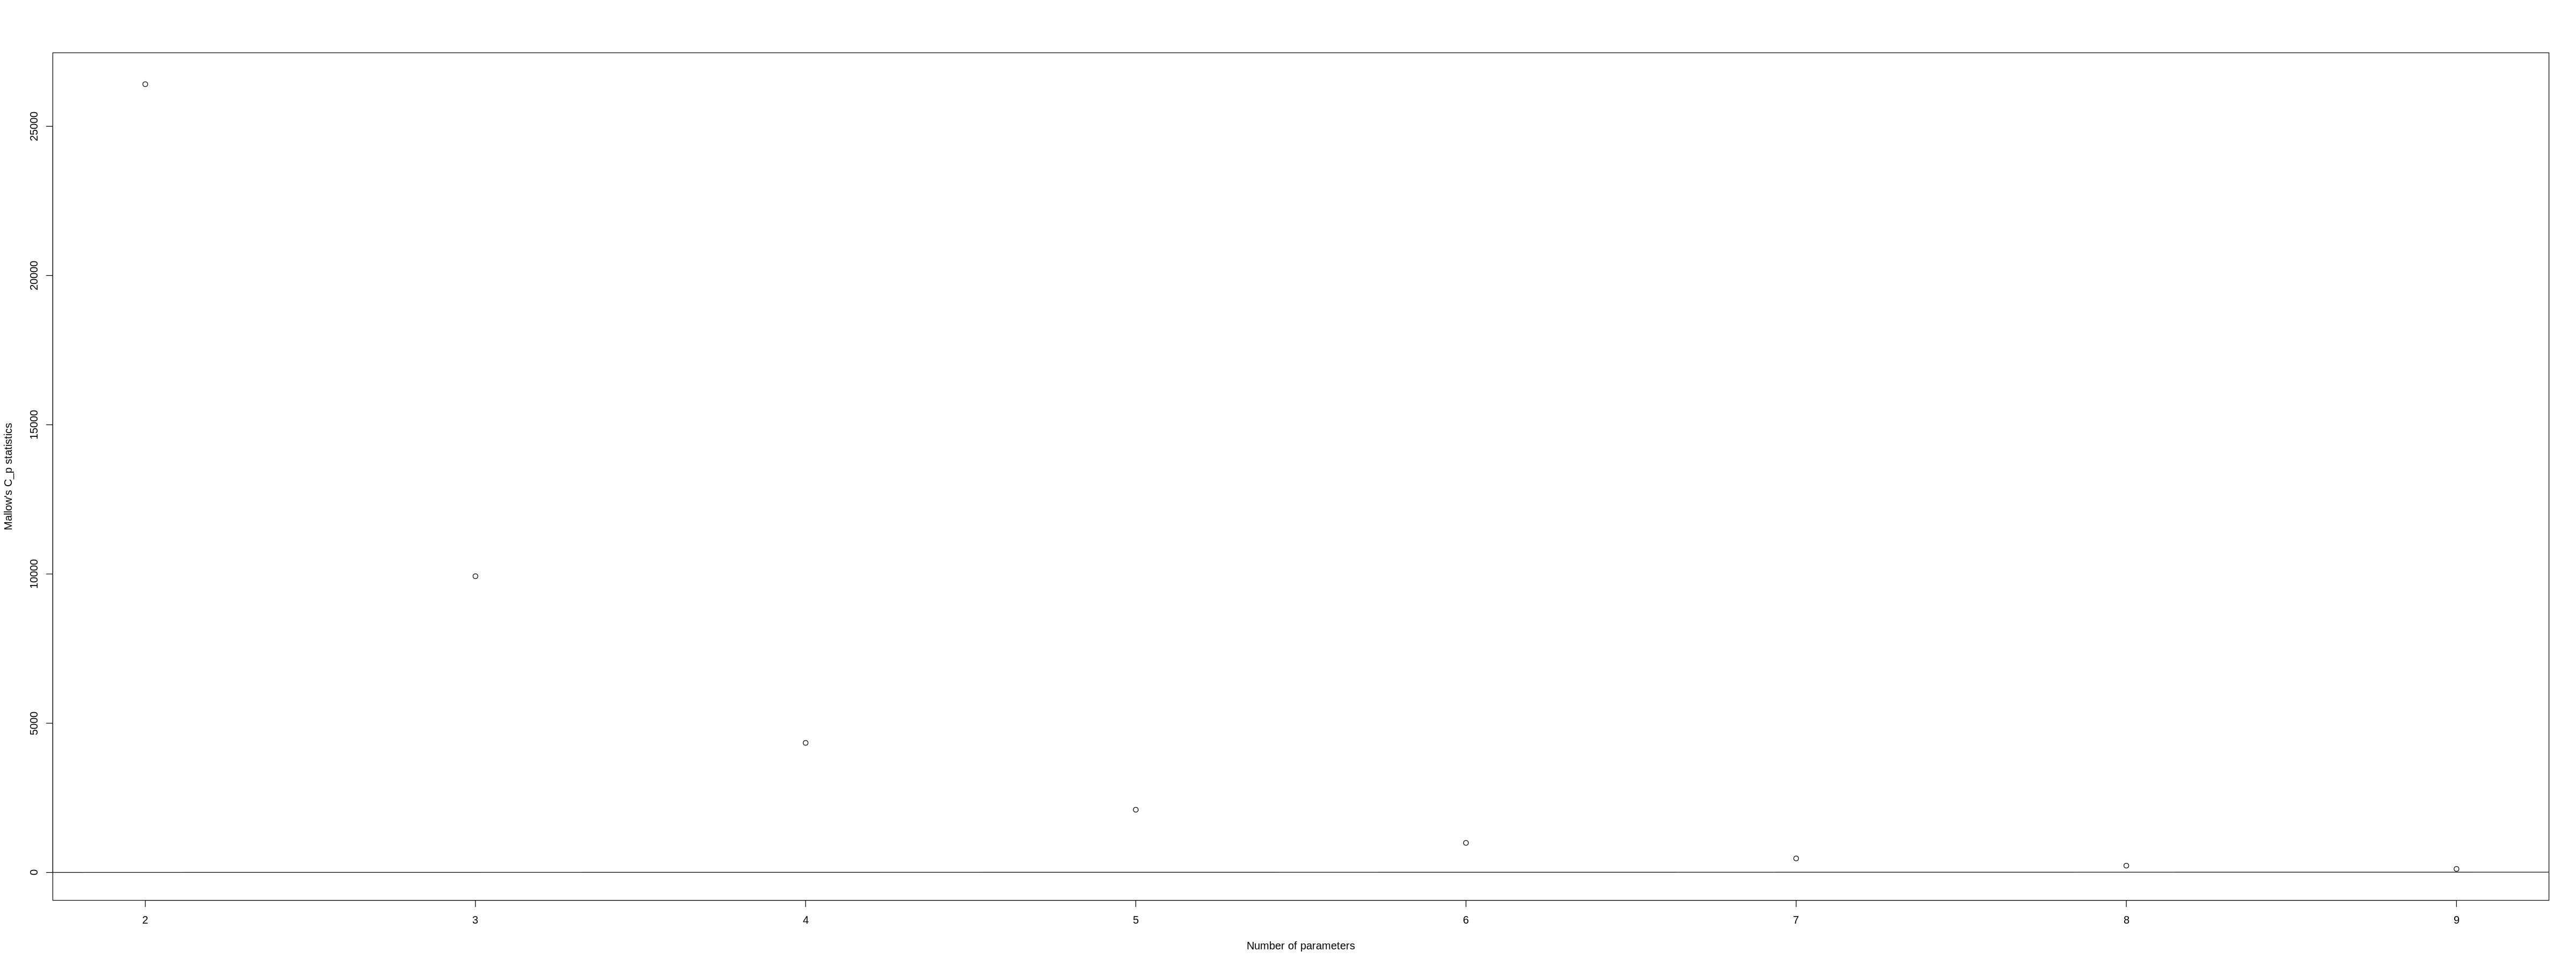

In [20]:
cp_list <- summary(search)$cp
p_list <- c(2, 3, 4, 5, 6, 7, 8, 9)
plot(p_list, cp_list, xlab = "Number of parameters", ylab = "Mallow's C_p statistics")
abline(a = 0, b = 1)

In [21]:
# Fit the selected model from the exhaustive search above. Only drop the Region variable from the full model.
# Notice that the R^2 decreases a lot.
selected_model <- lm(logprice~Number_Beds+Number_Baths+Population+Latitude+Longitude+Median_Family_Income, data=data)
summary(selected_model)


Call:
lm(formula = logprice ~ Number_Beds + Number_Baths + Population + 
    Latitude + Longitude + Median_Family_Income, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3616  -0.2731  -0.0246   0.2586   3.7016 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.752e+01  5.220e-02  335.70   <2e-16 ***
Number_Beds           3.048e-02  2.336e-03   13.05   <2e-16 ***
Number_Baths          2.462e-01  2.965e-03   83.06   <2e-16 ***
Population            8.705e-08  2.476e-09   35.16   <2e-16 ***
Latitude             -1.593e-01  1.283e-03 -124.13   <2e-16 ***
Longitude            -2.456e-02  2.066e-04 -118.91   <2e-16 ***
Median_Family_Income  3.264e-06  2.286e-07   14.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.513 on 35761 degrees of freedom
Multiple R-squared:  0.5327,	Adjusted R-squared:  0.5326 
F-statistic:  6794 on 6 and 35761 DF,  p-value: 

In [22]:
options(repr.plot.width = 40, repr.plot.height = 20)

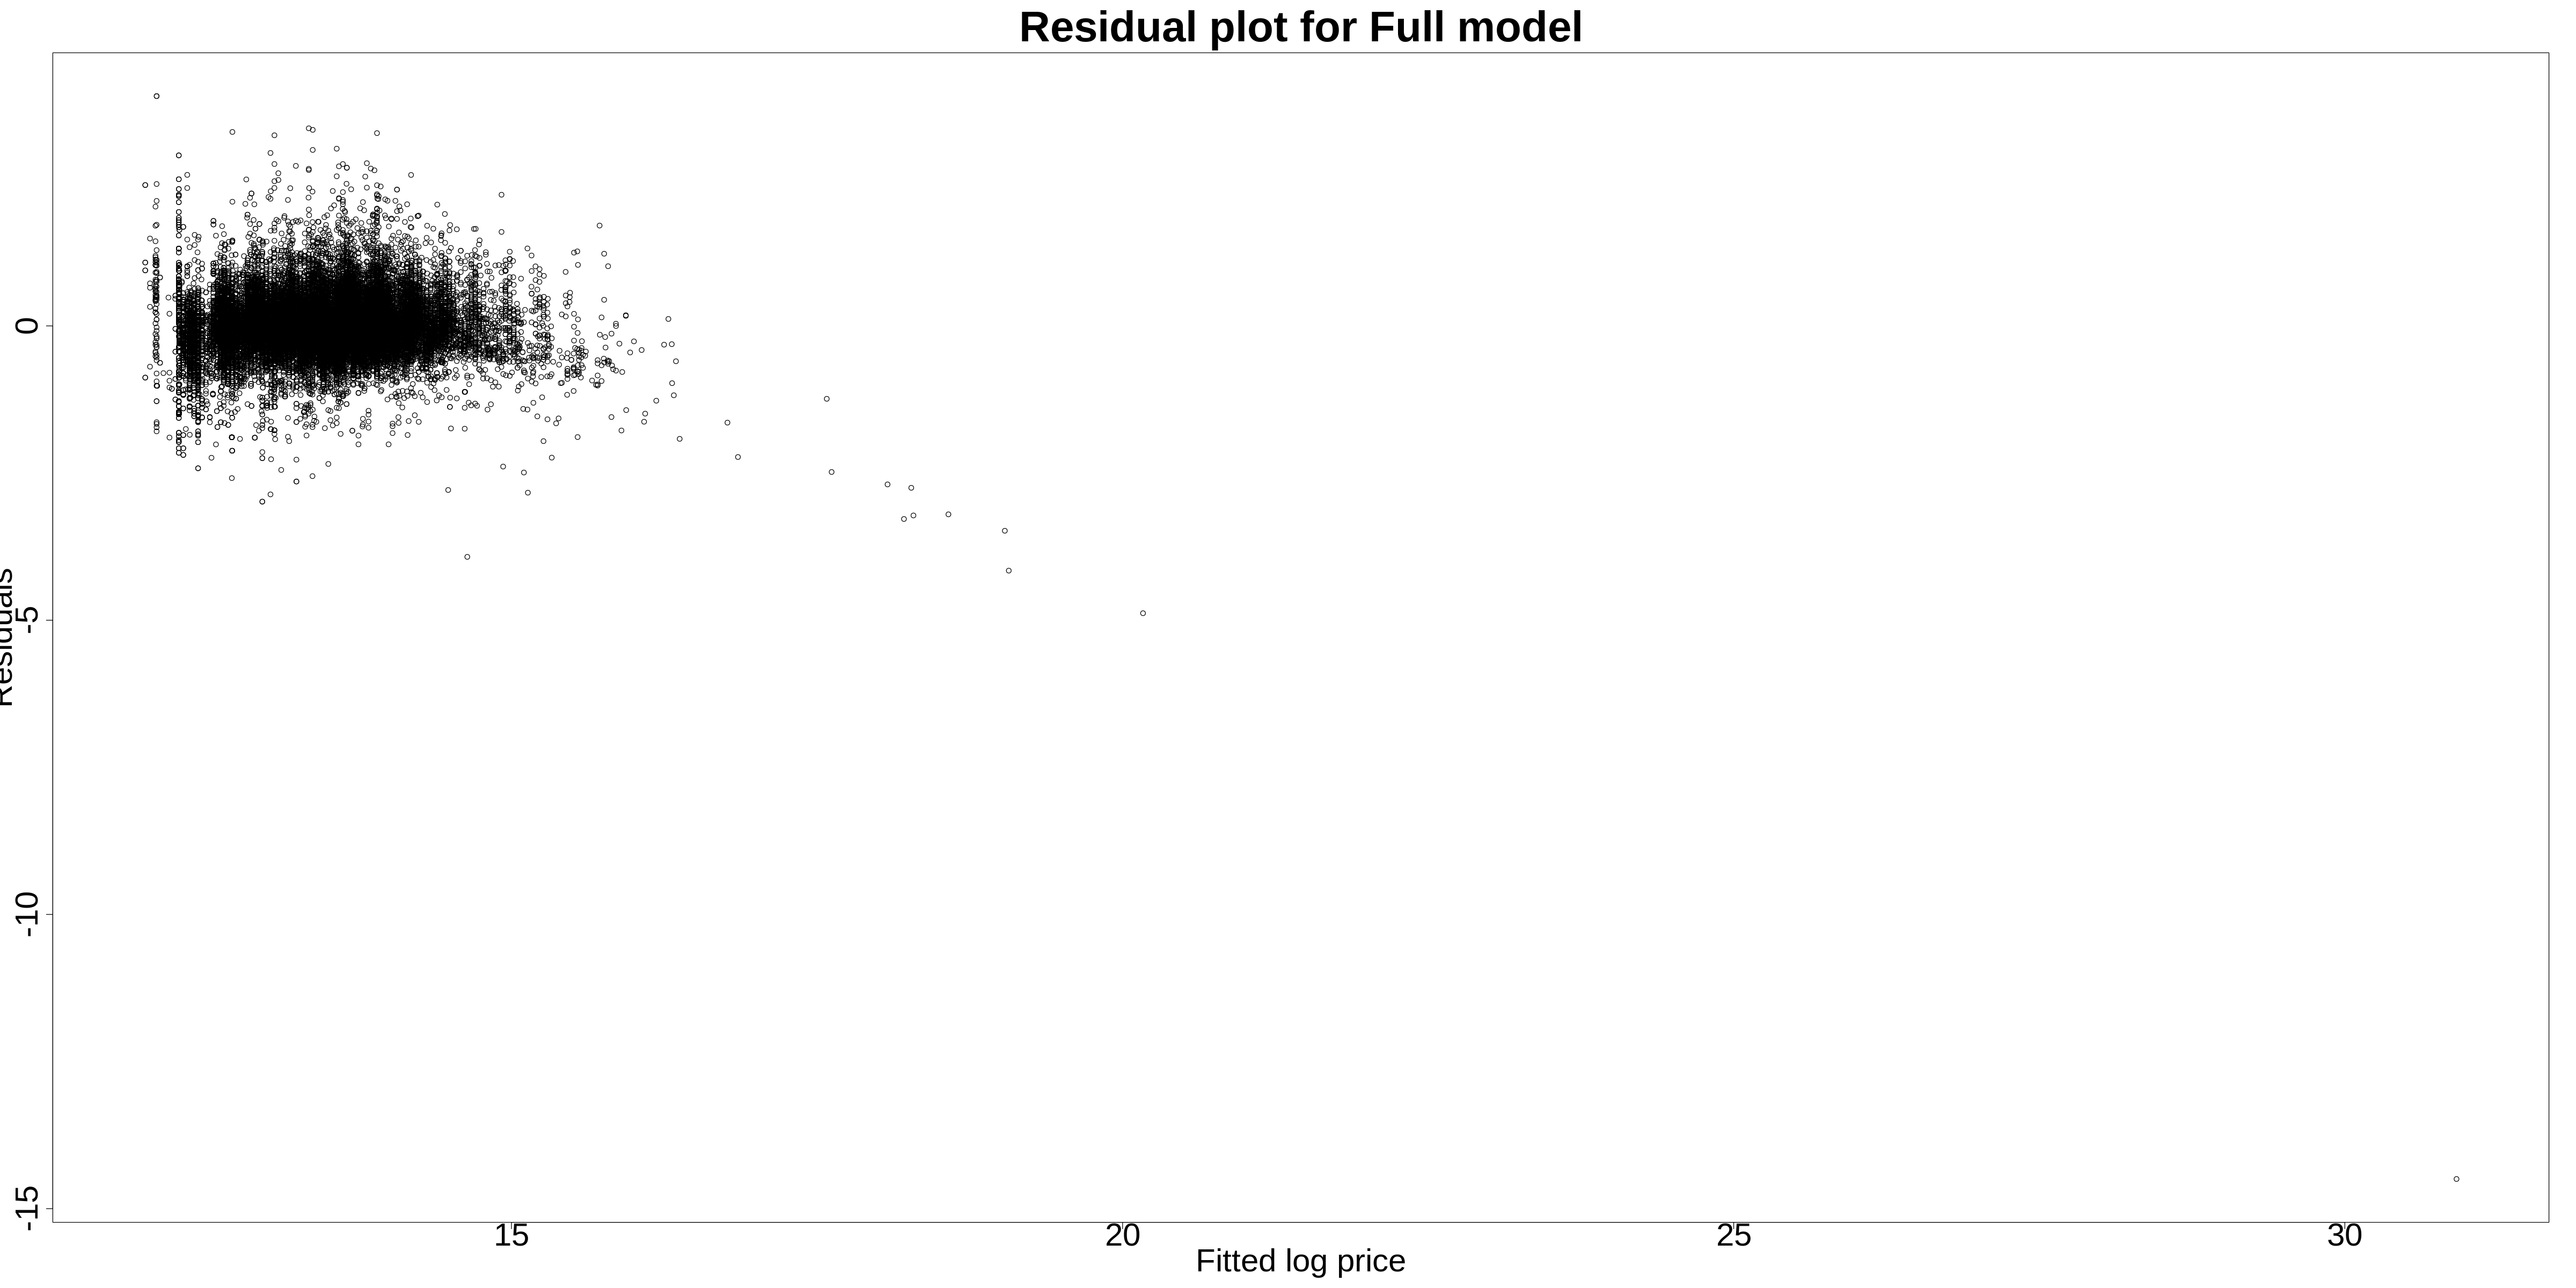

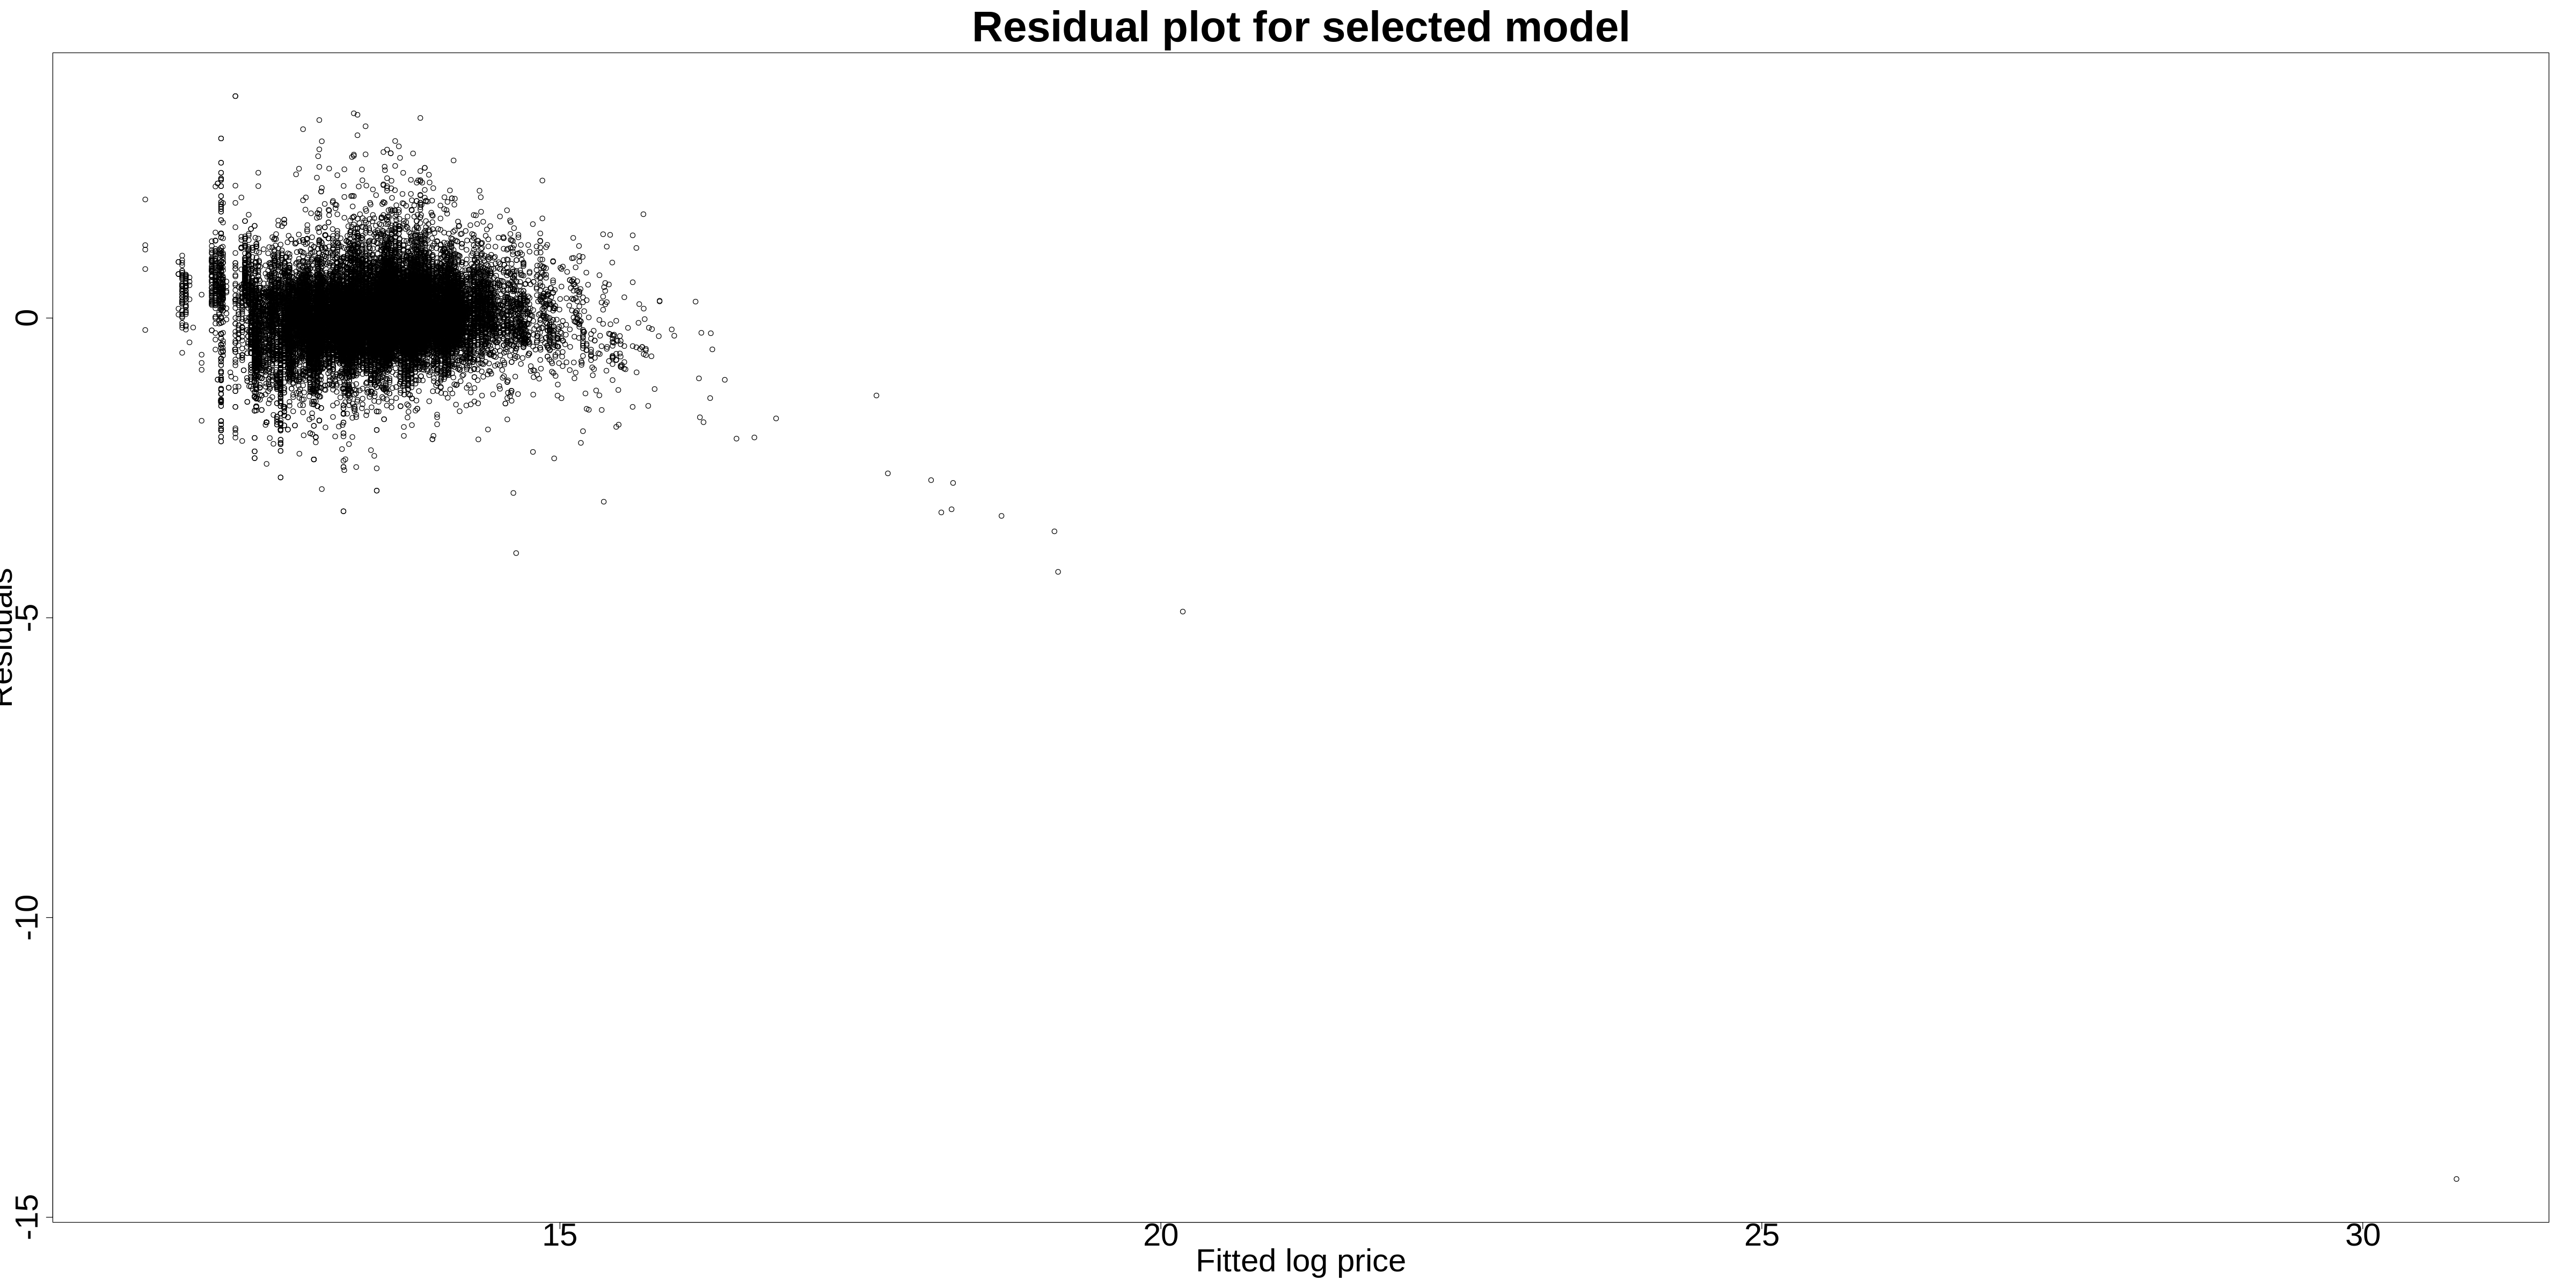

In [23]:
# Residual plots for the full model and selected model
plot(full_model$fitted.values, full_model$residuals, xlab = "Fitted log price", ylab = "Residuals",
     main = "Residual plot for Full model", cex.main = 4, cex.lab = 3, cex.axis = 3)
plot(selected_model$fitted.values, selected_model$residuals, xlab = "Fitted log price", ylab = "Residuals",
     main = "Residual plot for selected model", cex.main = 4, cex.lab = 3, cex.axis = 3)